<a href="https://colab.research.google.com/github/jiiiisoo/machinelearning/blob/main/supervised%20learning_regression_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **오버피팅**

선형 기저 함수 모델의 경우 문제는 M을 어떻게 정하느냐이다.M을 크게 하면 어떤 데이터에도 잘 피팅이 되는지 M=2,4,7,9 의 모델을 사용하여 비교해보겠다.

In [1]:
##앞에서 정의했던 필요한 데이터와 함수들 가져옴

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 나이에 따른 키의 인공 데이터 생성
np.random.seed(seed=1)
X_min=4 #X의 하한
X_max=30 #X의 상한
X_n=16 #데이터 개수
X=5+25*np.random.rand(X_n) #16명 나이 설정
Prm_c=[170, 108, 0.2] #생성 매개 변수
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.randn(X_n) #T:출력값
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

#가우스 함수
def gauss(x,mu,s):
  return np.exp(-(x-mu)**2/(2*s**2))

##선형 기저 함수 모델
def gauss_func(w,x):
  m=len(w)-1 # w의 개수는 가우스함수 개수보다 하나 많기 때문
  mu=np.linspace(5,30,m)
  s=mu[1]-mu[0]
  y=np.zeros_like(x) #x와 같은 크기로 요소가 0의 행렬 y를 작성
  for j in range(m):
    y=y+w[j]*gauss(x,mu[j],s)
  y=y+w[m]
  return y

##선형 기저 함수 모델의 mse (평균 제곱 오차)
#피팅의 수준 산출
def mse_gauss_func(x,t,w):
  y=gauss_func(w,x)
  mse=np.mean((y-t)**2)
  return mse

##선형 기저 함수 모델의 해석해 (정확한 값)
def fit_gauss_func(x,t,m):
  mu=np.linspace(5,30,m)
  s=mu[1]-mu[0]
  n=x.shape[0]
  psi=np.ones((n,m+1)) #항상 1 출력하는 더미함수 (psi_(m+1)=1 만들기 위함)
  for j in range (m):
    psi[:,j]=gauss(x,mu[j],s)
  psi_T=np.transpose(psi)
  
  a=np.linalg.inv(psi_T.dot(psi))
  b=a.dot(psi_T)
  w=b.dot(t)
  return w

##가우스 기저 함수 표시
def show_gauss_func(w):
  xb=np.linspace(X_min,X_max,100)
  y=gauss_func(w,xb)
  plt.plot(xb,y,c=[.5,.5,.5], lw=4)

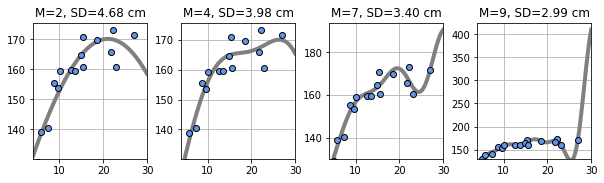

In [3]:
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace=0.3)

M=[2,4,7,9]
for i in range (len(M)):
  plt.subplot(1,len(M),i+1)
  W=fit_gauss_func(X,T,M[i])
  show_gauss_func(W)
  plt.plot(X,T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
  plt.xlim(X_min,X_max)
  plt.grid(True)
  plt.ylim(130.180)
  mse=mse_gauss_func(X,T,W)
  plt.title('M={0:d}, SD={1:.2f} cm'.format(M[i],np.sqrt(mse)))
  
plt.show()

M값이 커질 수록 SD 값은 줄어듦을 볼 수 있지만 M=7,9 일 때는 그래프가 20-30 부근에서 꺾인다. 이는 M이 증가할 수록 선형 기저 함수 모델은 작은 곡선도 표현 가능하므로 곡선이 데이터 점에 근접하게 되어 SD는 감소하지만 데이터가 없는 곳에서는 평균 제곱 오차와 관계가 없기 때문에 데이터 점이 있는 곳에서 억지로 데이터 점에 가까워 지려고 하여 데이터 점이 없는 곳에서는 뒤틀린다.

이러한 모델 행동을 over-fitting 이라고 한다.

이를 통해 최적의 M을 찾을 때 SD가 기준이 되지 않음을 알 수 있다. 따라서 새 데이터에 대한 예측의 데이터에 초점을 맞춰야한다.

예를 들어 데이터 X와 t의 4/1를 test data, 3/4를 training data로 나누어 w를 training data만을 사용하여 최적화시킨 뒤, 이를 통한 w를 사용하여 test data의 SD 또는 J를 계산하여 M의 평가 기준으로 활용한다. 즉, 훈련에 이용하지 않은 미지의 데이터에 대한 예측 오차로 M을 평가하는 것이다. 이를 holdout 검증이라고 한다.

어떤 비율로 test와 training data를 나눴는지도 결과에 영향을 주겠지만 일단 각각 1/4, 3/4로 한 후 M=2,4,7,9 로 피팅해본다.


출처: 파이썬으로 배우는 머신러닝의 교과서-이시카와아키히코